In [ ]:
## Link to github repo with datasets and saved models: https://github.com/jb18529/DissertationDataset

In [1]:
# Initial Classification Network for Indoor Dataset

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-09-07 23:51:51.743784: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 23:51:52.285982: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 23:51:55.629897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
pathlib
data_train = pathlib.Path('/home/joel/Documents/MSc_C_Nott/Dissertation/TRAIN')

# 288-dataset
#data_train = pathlib.Path('/home/joel/Documents/MSc_C_Nott/Dissertation/IndoorDatasetTrain')
#data_test = pathlib.Path('/home/joel/Documents/MSc_C_Nott/Dissertation/IndoorDatasetTest')

## 576-dataset
data_train = pathlib.Path('/home/joel/Documents/MSc_C_Nott/Dissertation/TRAIN')
data_test = pathlib.Path('/home/joel/Documents/MSc_C_Nott/Dissertation/TEST')

# data_test.exists()
data_train.exists()

True

In [7]:
###Pre-Processing - only needs to run once on raw dataset, not required as both IndoorDataset... and TRAIN/TEST are preprocessed

## Rotate Training Images to Upright position, 270 degrees counterclockwise
# import os
# import glob
# from PIL import Image
# all_images = list(data_train.glob('*/*/*.jpg'))
# all_images.sort()
# print(len(all_images))
# # src_im = Image.open(all_images[0])
# # src_im
# for file in all_images:
#     src_im = PIL.Image.open(str(file))
#     src_im
#     src_im_rotate = src_im.rotate(270)
#     #print(src_im_rotate)
#     src_im_rotate.save(file)

###############################################################################
## Rotate Test images upright, so 270 degrees counterclockwise
# all_images = list(data_test.glob('*/*/*.jpg'))
# all_images.sort()
# print(len(all_images))
# # src_im = Image.open(all_images[0])
# # src_im
# for file in all_images:
#     src_im = PIL.Image.open(str(file))
#     src_im
#     src_im_rotate = src_im.rotate(270)
#     #print(src_im_rotate)
#     src_im_rotate.save(file)

###############################################################################
## Coordinate method to remove black columns on Training Images

# from PIL import Image

# all_images = list(data_train.glob('*/*/*.jpg'))
# all_images.sort()

# for img in all_images:
#     s_im = Image.open(str(img))
#     s_im2 = s_im.crop((508, 10, 3520, 3014))
#     s_im2.save(str(img))

################################################################################
## TESTING
# # im = pathlib.Path('/home/joel/Documents/MSc_C_Nott/Dissertation/IMG_8975.HEIC.jpg')
# # img = Image.open(str(im))
# # img2 = img.crop((504, 10, 3530, 3014))
# # img2.save(str(pathlib.Path('/home/joel/Documents/MSc_C_Nott/Dissertation/IMG_TEST.jpg')))


################################################################################
# # Remove black columns on Test Images
# from PIL import Image

# all_images = list(data_test.glob('*/*/*.jpg'))
# all_images.sort()

# for img in all_images:
#     s_im = Image.open(str(img))
#     s_im2 = s_im.crop((508, 10, 3520, 3014))
#     s_im2.save(str(img))

432


In [ ]:
## Preview image from training set
AE2 = list(data_train.glob('AA2/train/*'))
AE2.sort()
print(AE2)
PIL.Image.open(str(AE2[3]))

In [ ]:
## Preview image from testing set
AE2 = list(data_test.glob('AE2/tests/*'))
AE2.sort()
print(AE2)
PIL.Image.open(str(AE2[2]))

In [4]:
batch_size = 32
img_height = 200
img_width = 200

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_train,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_test,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names


Found 432 files belonging to 24 classes.


Found 144 files belonging to 24 classes.


In [ ]:
# Preview images in training set
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
# Ensures the dataset does not become a bottleneck when training model
# Overlaps data preprocessing and model execution when training

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [7]:
# Data augmentation

data_augmentation = keras.Sequential(
    [
        layers.RandomTranslation(
            input_shape=(img_height,
                         img_width,
                         3),
            height_factor=(0.0),
            width_factor=(-0.3, -0.1),
            fill_mode='constant',
            interpolation='bilinear',
            seed=123,
            fill_value=255

        ),
        layers.RandomTranslation(
            input_shape=(img_height,
                         img_width,
                         3),
            height_factor=(0.0),
            width_factor=(-0.3, -0.1),
            fill_mode='constant',
            interpolation='bilinear',
            seed=123,
            fill_value=255

        )
    ]
)
data_aug2 = keras.Sequential(
    [   layers.RandomTranslation(
            input_shape=(img_height,
                            img_width,
                            3),
            height_factor=(0.0),
            width_factor=(0.1, 0.3),
            fill_mode='constant',
            interpolation='bilinear',
            seed=100,
            fill_value=255

        ),
        layers.RandomTranslation(
            input_shape=(img_height,
                            img_width,
                            3),
            height_factor=(0.0),
            width_factor=(0.1, 0.3),
            fill_mode='constant',
            interpolation='bilinear',
            seed=100,
            fill_value=255

        ),

    ]
)
data_aug3 = keras.Sequential(
    [   layers.RandomTranslation(
            input_shape=(img_height,
                            img_width,
                            3),
            height_factor=(0.0),
            width_factor=(0.0, 0.0),
            fill_mode='constant',
            interpolation='bilinear',
            seed=110,
            fill_value=255

        ),
        layers.RandomTranslation(
            input_shape=(img_height,
                            img_width,
                            3),
            height_factor=(0.0),
            width_factor=(0.0, 0.0),
            fill_mode='constant',
            interpolation='bilinear',
            seed=110,
            fill_value=255

        ),

    ]
)

In [8]:
# Creating the augmented training dataset, 3 times the size of original
aug_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
aug_ds2 = train_ds.map(lambda x, y: (data_aug2(x, training=True), y))
aug_ds3 = train_ds.map(lambda x, y: (data_aug3(x, training=True), y))

all_ds2 = train_ds.concatenate(aug_ds)
all_ds1 = all_ds2.concatenate(aug_ds2)
all_ds = all_ds1.concatenate(aug_ds3)

2023-09-07 05:15:06.491168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [432]
	 [[{{node Placeholder/_0}}]]
2023-09-07 05:15:06.493688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [432]
	 [[{{node Placeholder/_0}}]]


32
32


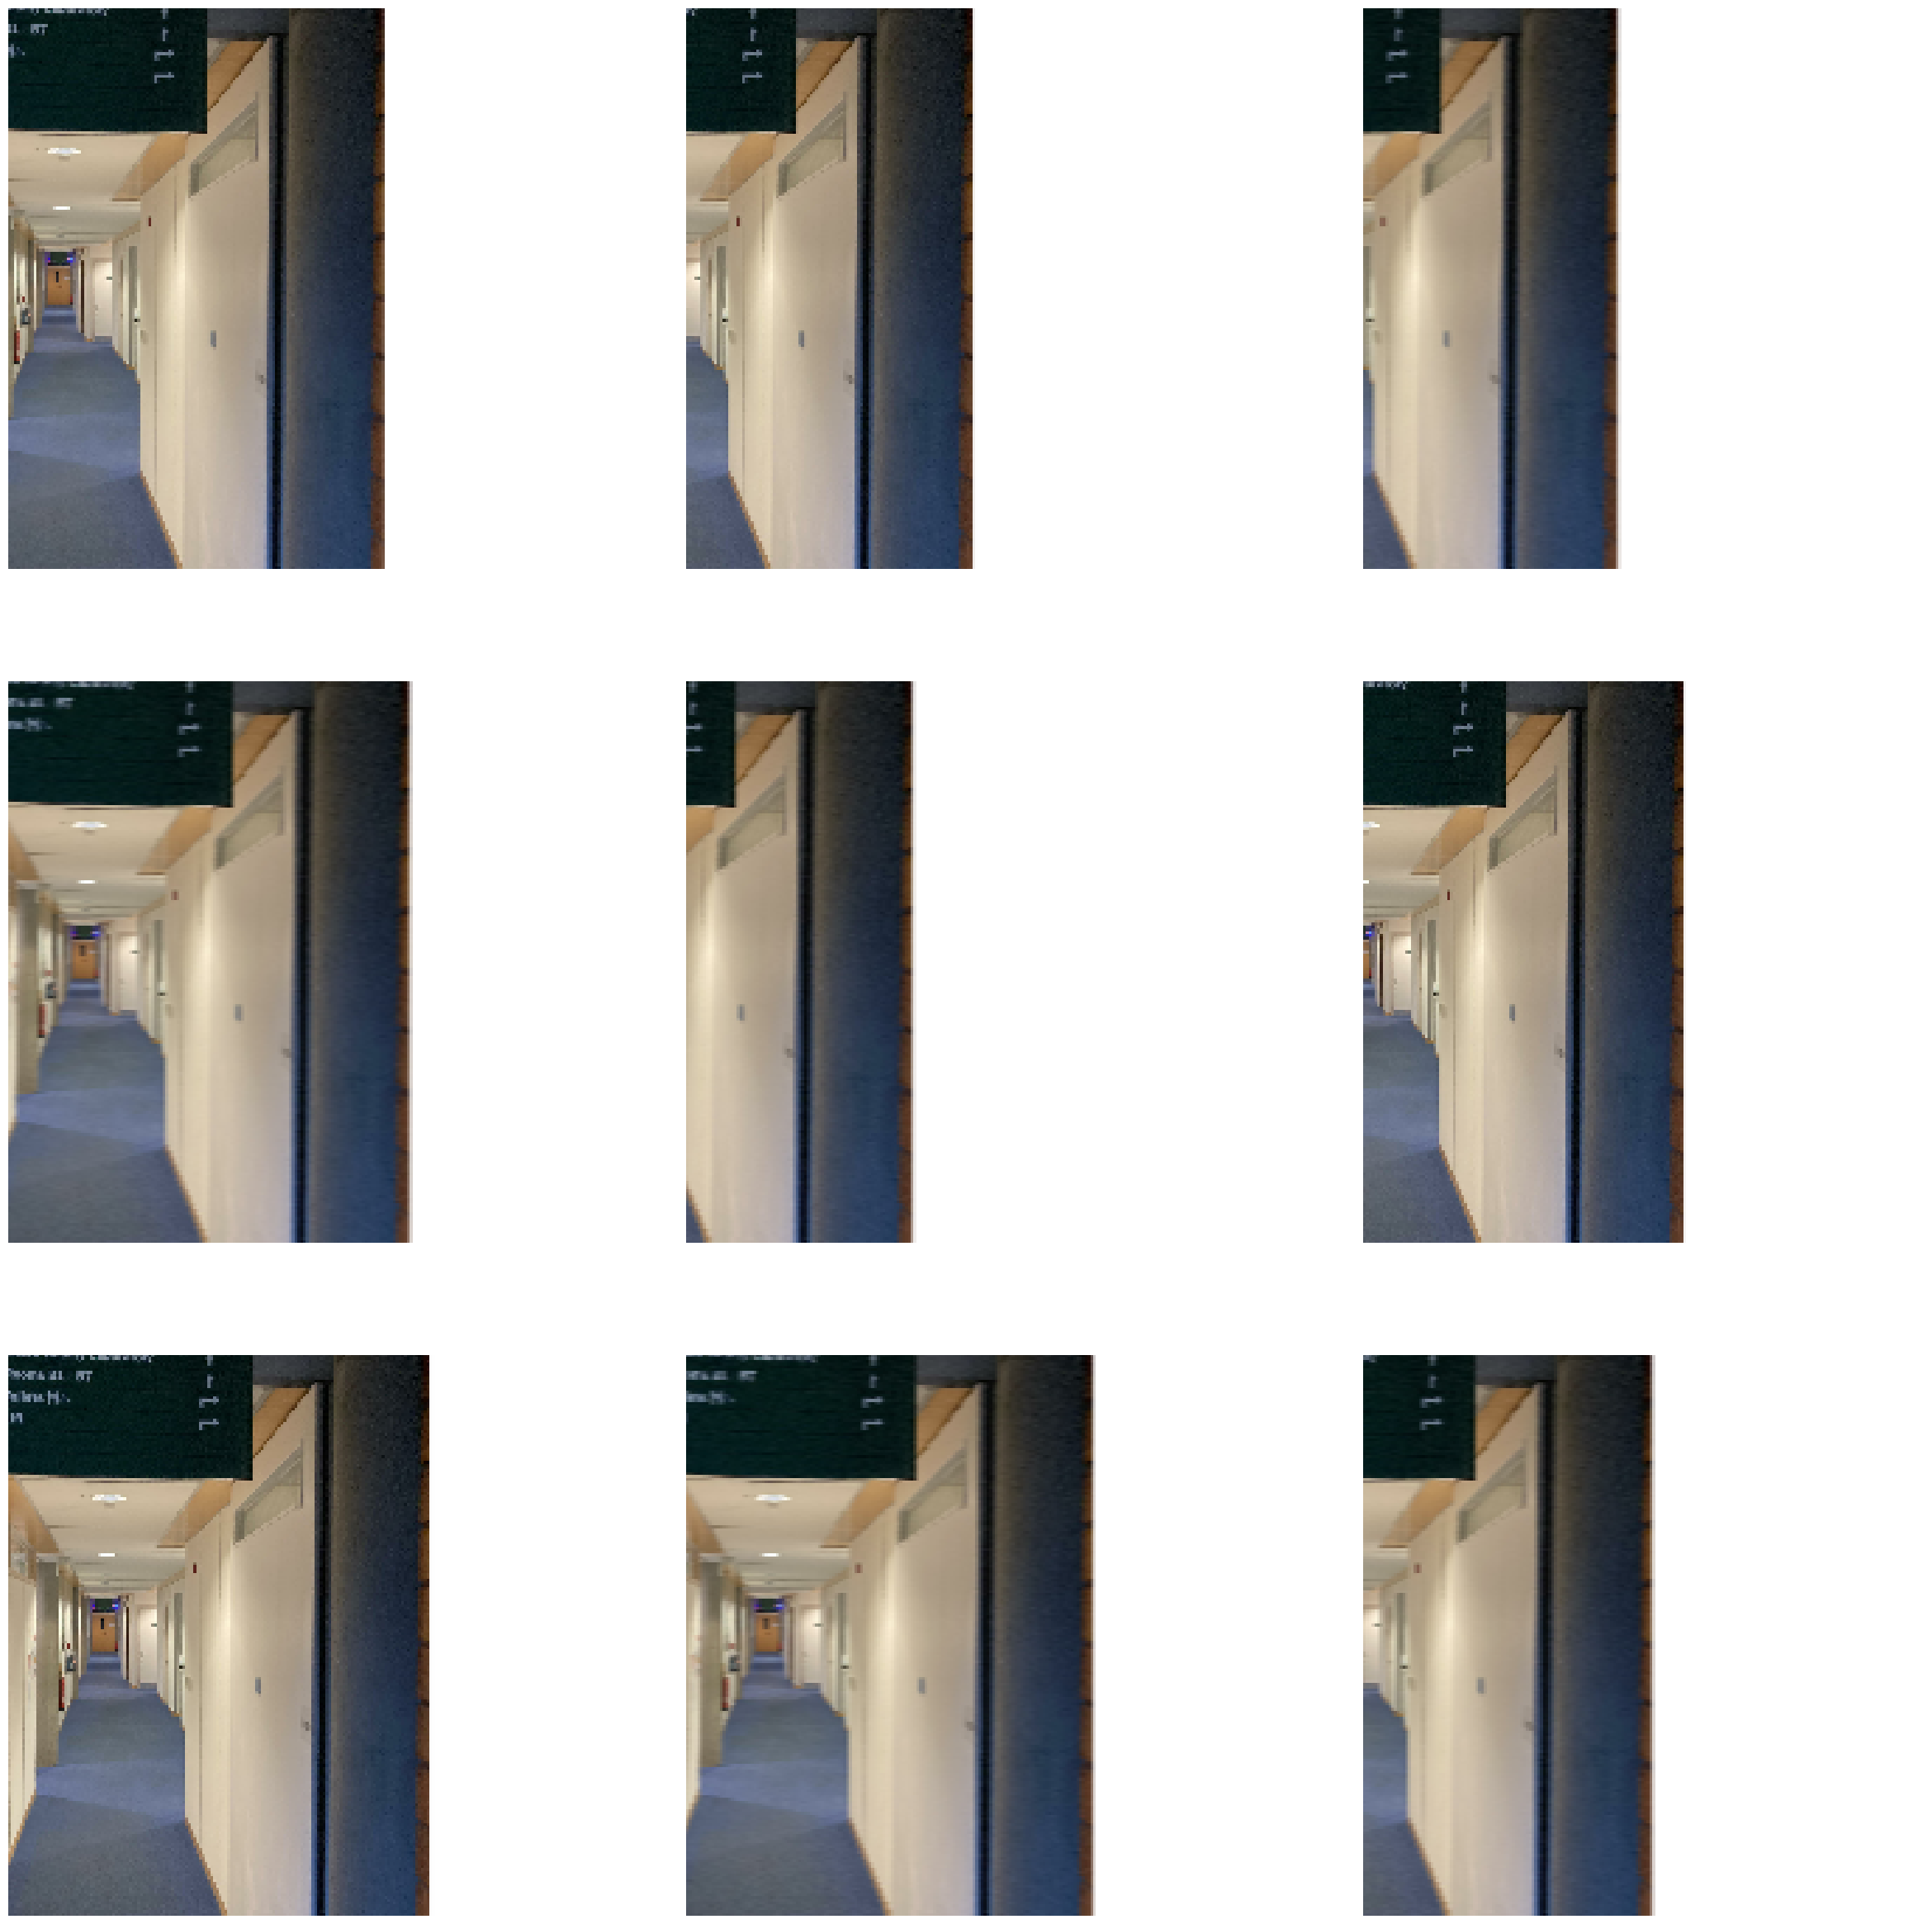

In [127]:
## Preview augmented images
# image = tf.cast(tf.expand_dims(image, 0), tf.float32)
plt.figure(figsize=(30, 30))
for images, l in train_ds.take(1):
    print(len(images))
    print(len(l))
    for i in range(9):
        augmented_images = data_augmentation(images)
        #aug_mented_images = images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [27]:
## Network Architecture

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), #pool_size 2x2 and stride is 2 by default
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])

# # # Experimenting with Alex net with 3x3 filter sizes instead
# # model = Sequential([
# #     layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
# #     layers.Conv2D(16, 3, padding='same', activation='relu'),
# #     layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
# #     #layers.BatchNormalization(),
# #     layers.Conv2D(32, 3, padding='same', activation='relu'),
# #     layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
# #     layers.Dropout(0.5),
# #     #layers.BatchNormalization(),    
# #     layers.Conv2D(64, 3, padding='same', activation='relu'),
# #     #layers.BatchNormalization(), 
# #     layers.Conv2D(64, 3, padding='same', activation='relu'),
# #     #layers.BatchNormalization(), 
# #     layers.Conv2D(32, 3, padding='same', activation='relu'),
# #     layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
# #     layers.Dropout(0.5),
# #     #layers.BatchNormalization(),    
# #     layers.Flatten(),
# #     layers.Dense(128, activation='relu'),
# #     #layers.Dropout(0.5),
# #     layers.Dense(128, activation='relu'),
# #     #layers.Dropout(0.5),
# #     layers.Dense(num_classes, name="outputs")
# # ])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [29]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 99, 99, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 49, 49, 32)       

In [30]:
epochs = 20
history = model.fit(
    all_ds,
    validation_data = test_ds,
    epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 169s 3s/step - loss: 3.1844 - accuracy: 0.0434 - val_loss: 3.1762 - val_accuracy: 0.0833
Epoch 2/20
56/56 [==============================] - 146s 3s/step - loss: 3.1659 - accuracy: 0.0394 - val_loss: 3.1781 - val_accuracy: 0.0417
Epoch 3/20
56/56 [==============================] - 149s 3s/step - loss: 3.1784 - accuracy: 0.0370 - val_loss: 3.1780 - val_accuracy: 0.0417
Epoch 4/20
56/56 [==============================] - 164s 3s/step - loss: 3.1783 - accuracy: 0.0376 - val_loss: 3.1766 - val_accuracy: 0.0486
Epoch 5/20
56/56 [==============================] - 184s 3s/step - loss: 3.1784 - accuracy: 0.0382 - val_loss: 3.1787 - val_accuracy: 0.0417
Epoch 6/20
56/56 [==============================] - 152s 3s/step - loss: 3.1790 - accuracy: 0.0347 - val_loss: 3.1781 - val_accuracy: 0.0417
Epoch 7/20
56/56 [==============================] - 152s 3s/step - loss: 3.1801 - accuracy: 0.0370 - val_loss: 3.1776 - val_accuracy: 0.0417
Epoch 8/20
56/56 [======

In [93]:
## Save model to folder
# !mkdir -p saved_model
# model.save('saved_model288/my_model')

2023-09-07 03:25:05.363135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,25,25,64]
	 [[{{node inputs}}]]
2023-09-07 03:25:07.368610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,25,25,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: saved_model288/my_model/assets


INFO:tensorflow:Assets written to: saved_model288/my_model/assets


In [ ]:
# # Load saved model

#saved_model = tf.keras.models.load_model('saved_model288/my_model')
saved_model = tf.keras.models.load_model('saved_model576v1/my_model')
# saved_model.summary()


In [94]:
model.evaluate(test_ds, return_dict=True)

3/3 [==============================] - 1s 324ms/step - loss: 4.0683 - accuracy: 0.3438 - root_mean_squared_error: 15.3453


{'loss': 4.068297863006592,
 'accuracy': 0.34375,
 'root_mean_squared_error': 15.34526252746582}

In [95]:
y_pred = model.predict(test_ds)

3/3 [==============================] - 1s 344ms/step


In [96]:
y_pred = tf.argmax(y_pred, axis=1)

In [97]:
y_true = tf.concat(list(test_ds.map(lambda s,lab: lab)), axis=0)


2023-09-07 03:25:21.402674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [96]
	 [[{{node Placeholder/_0}}]]
2023-09-07 03:25:21.403882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [96]
	 [[{{node Placeholder/_4}}]]


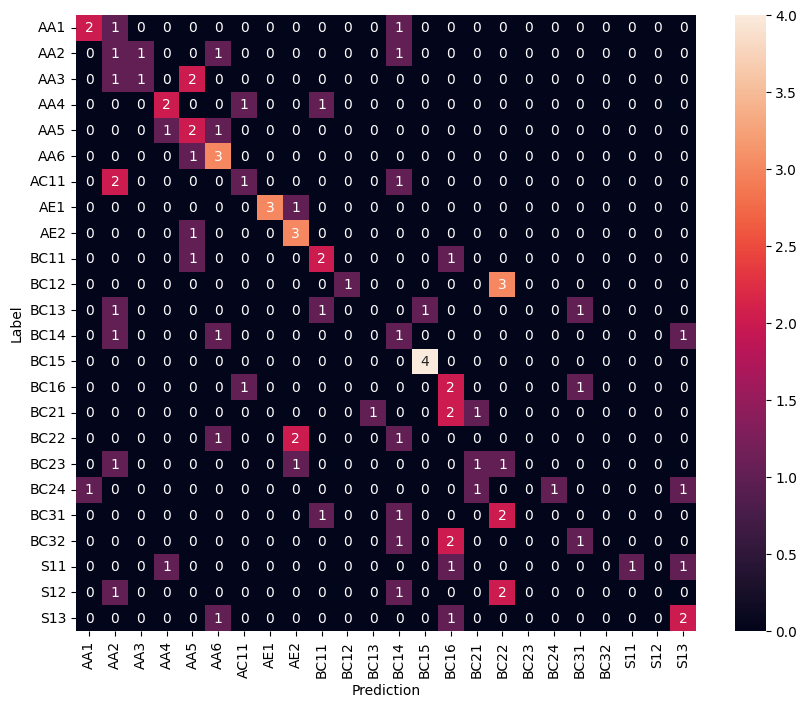

In [102]:
## Confusion matrix for test set
# For accurate results run buffer, prefetch AUTOTUNE code before running this cell.

import seaborn as sns
label_names = test_ds.class_names
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()


In [81]:
# confusion matrix for training set
y_pred1 = model.predict(all_ds)
y_pred1 = tf.argmax(y_pred1, axis=1)
y_true1 = tf.concat(list(all_ds.map(lambda s,lab: lab)), axis=0)


56/56 [==============================] - 19s 338ms/step


2023-08-16 06:44:58.219877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_54' with dtype resource
	 [[{{node Placeholder/_54}}]]
2023-08-16 06:44:58.221542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_85' with dtype resource
	 [[{{node Placeholder/_85}}]]


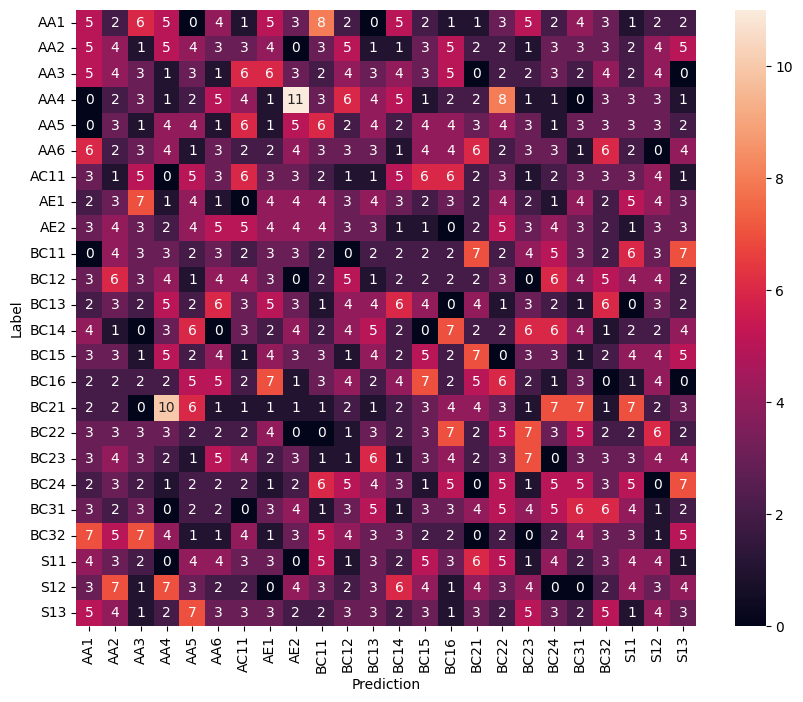

In [82]:
# Confusion matrix for training set
label_names = train_ds.class_names
confusion_mtx = tf.math.confusion_matrix(y_true1, y_pred1)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

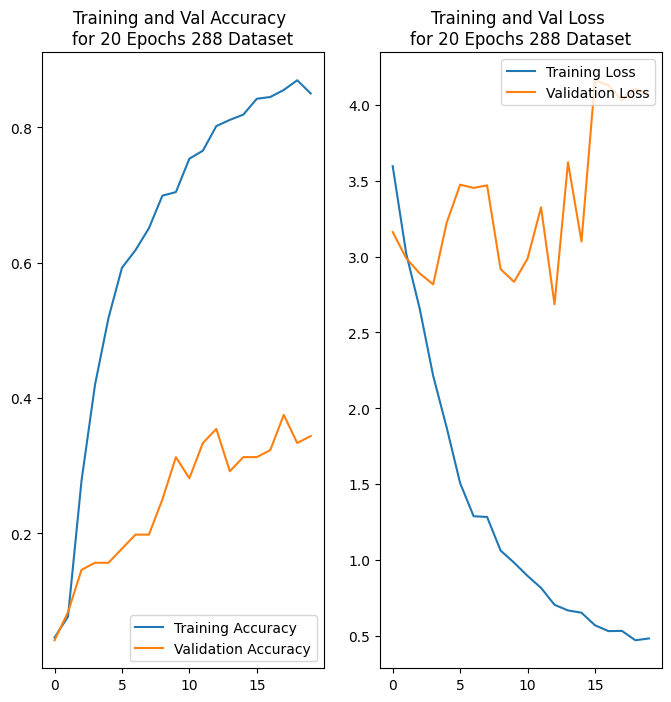

In [103]:
# Training and Validation Accuracy and Loss Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Val Accuracy \nfor 20 Epochs 288 Dataset')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Val Loss \nfor 20 Epochs 288 Dataset')
plt.show()

In [110]:
# Calculating Precision, Recall and F1 score
#https://stackoverflow.com/questions/35365007/tensorflow-precision-recall-f1-score-and-confusion-matrix

predicted = tf.cast(y_pred, tf.float32)
actual = tf.cast(y_true, tf.float32)

TP = tf.math.count_nonzero(predicted * actual)
TN = tf.math.count_nonzero((predicted - 1) * (actual - 1))
FP = tf.math.count_nonzero(predicted * (actual - 1))
FN = tf.math.count_nonzero((predicted - 1) * actual)

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)

print('Precision:', precision, '\nRecall:', recall, '\nF1 Score:', f1)

Precision: tf.Tensor(0.5055555555555555, shape=(), dtype=float64) 
Recall: tf.Tensor(0.52, shape=(), dtype=float64) 
F1 Score: tf.Tensor(0.5126760563380282, shape=(), dtype=float64)


In [ ]:
# https://stackoverflow.com/questions/35365007/tensorflow-precision-recall-f1-score-and-confusion-matrix
def tf_f1_score(y_true, y_pred):
    """Computes 3 different f1 scores, micro macro
    weighted.
    micro: f1 score accross the classes, as 1
    macro: mean of f1 scores per class
    weighted: weighted average of f1 scores per class,
            weighted from the support of each class


    Args:
        y_true (Tensor): labels, with shape (batch, num_classes)
        y_pred (Tensor): model's predictions, same shape as y_true

    Returns:
        tuple(Tensor): (micro, macro, weighted)
                    tuple of the computed f1 scores
    """

    f1s = [0, 0, 0]

    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)

    for i, axis in enumerate([None, 0]):
        TP = tf.math.count_nonzero(y_pred * y_true, axis=axis)
        FP = tf.math.count_nonzero(y_pred * (y_true - 1), axis=axis)
        FN = tf.math.count_nonzero((y_pred - 1) * y_true, axis=axis)

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2 * precision * recall / (precision + recall)

        f1s[i] = tf.reduce_mean(f1)

    weights = tf.reduce_sum(y_true, axis=0)
    weights /= tf.reduce_sum(weights)

    f1s[2] = tf.reduce_sum(f1 * weights)

    micro, macro, weighted = f1s
    return micro, macro, weighted


def compare(nb, dims):
    labels = (np.random.randn(nb, dims) > 0.5).astype(int)
    predictions = (np.random.randn(nb, dims) > 0.5).astype(int)

    stime = time()
    mic = f1_score(labels, predictions, average='micro')
    mac = f1_score(labels, predictions, average='macro')
    wei = f1_score(labels, predictions, average='weighted')

    print('sklearn in {:.4f}:\n    micro: {:.8f}\n    macro: {:.8f}\n    weighted: {:.8f}'.format(
        time() - stime, mic, mac, wei
    ))

    gtime = time()
    tf.reset_default_graph()
    y_true = tf.Variable(labels)
    y_pred = tf.Variable(predictions)
    micro, macro, weighted = tf_f1_score(y_true, y_pred)
    with tf.Session() as sess:
        tf.global_variables_initializer().run(session=sess)
        stime = time()
        mic, mac, wei = sess.run([micro, macro, weighted])
        print('tensorflow in {:.4f} ({:.4f} with graph time):\n    micro: {:.8f}\n    macro: {:.8f}\n    weighted: {:.8f}'.format(
            time() - stime, time()-gtime,  mic, mac, wei
        ))

#compare(10 ** 6, 10)
tf_f1_score(y_true, y_pred)
